In [1]:
import matplotlib.pyplot as plt
import numpy as np

原始数据可视化

随机选择8个数据样本，代表1-8类

In [2]:
data = np.load('data/train/Bag.npy',mmap_mode='r')

sources = [63939, 63850, 64784, 9, 99999, 10811, 898, 11283]

x_axis = np.arange(0, 500)

时域

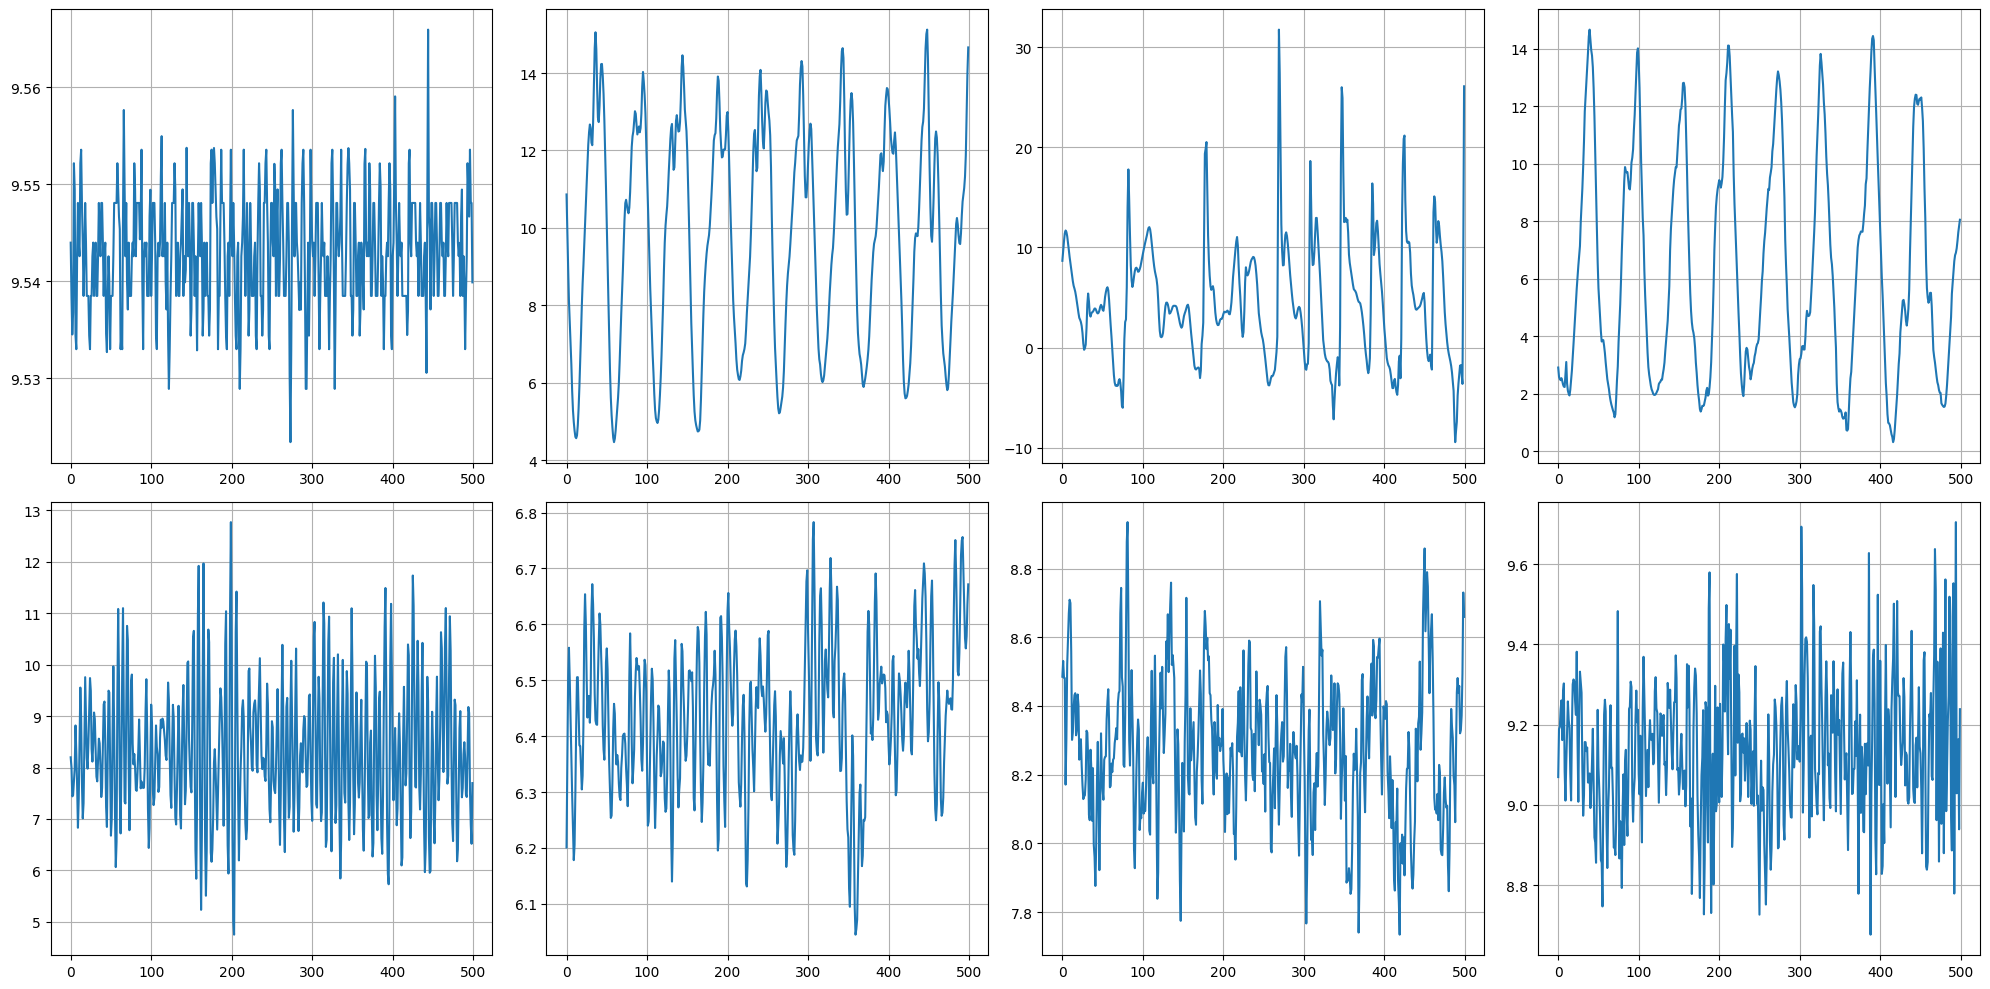

In [5]:
# 可视化
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

count = 0
# 绘制每个子图的数据
for i in sources:
    row = count // 4
    col = count % 4
    axs[row, col].plot(x_axis, data[i][0])
    axs[row, col].grid(True)
    count = count + 1
# 调整子图之间的间距
plt.tight_layout()
# 显示图形
plt.show()

FFT变换求幅度谱

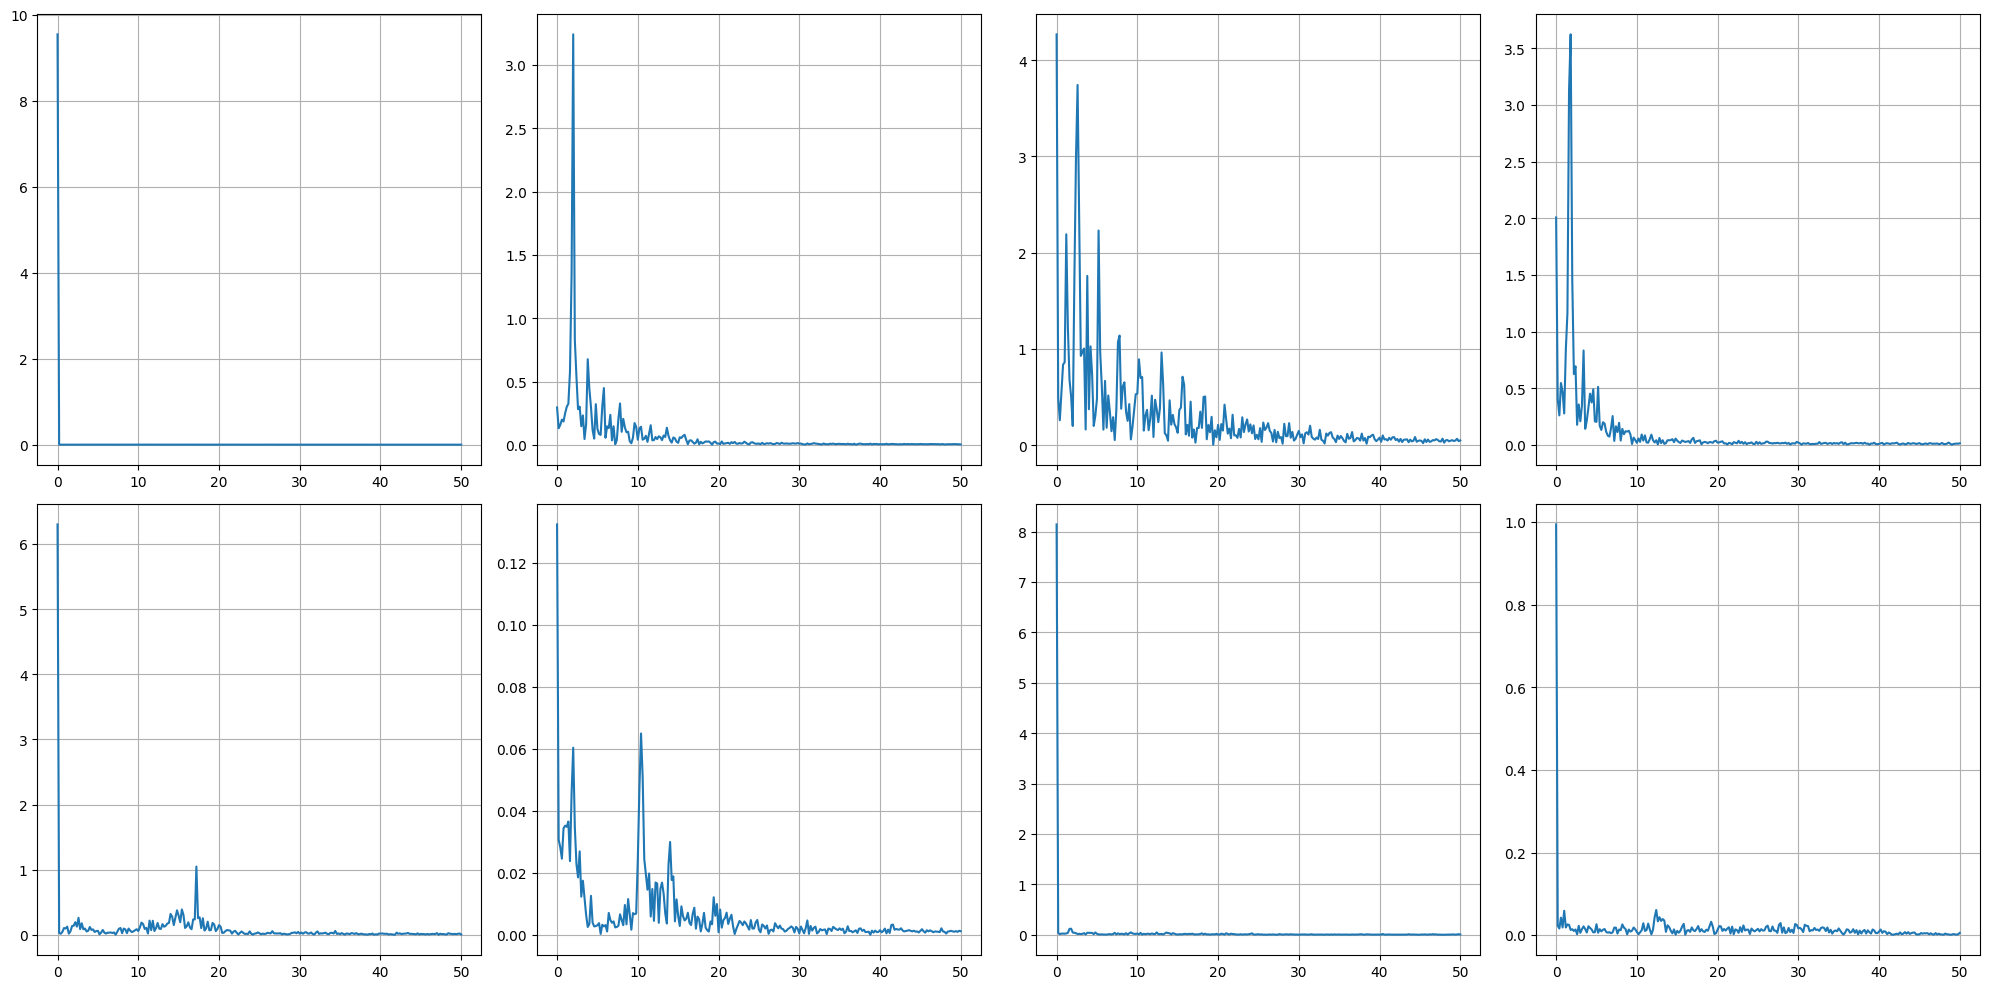

In [8]:
# 可视化
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

count = 0
# 绘制每个子图的数据
for i in sources:
    row = count // 4
    col = count % 4
    # 进行傅里叶变换
    source = data[i][0] - source.mean()
    fft_result = np.abs(np.fft.rfft(source))
    fft_result /= (500 / 2)
    fft_result[0] /= 2
    # 计算频率
    freqs = np.fft.rfftfreq(500, d=1/100)
    axs[row, col].plot(freqs, fft_result)
    axs[row, col].grid(True)
    count = count + 1
# 调整子图之间的间距
plt.tight_layout()
# 显示图形
plt.show()

检查数据空洞分布

In [9]:
data1 = np.load('data/val/Bag.npy')
data2 = np.load('data/val/Hand.npy')
sensor = [0,3,6]

In [12]:
loss = np.zeros(3)

for i in range(10000):
    for j in sensor:
        if np.all(data1[i][j]==0) and np.all(data1[i][j+1]==0) and np.all(data1[i][j+2]==0):
            if j == 0:
                loss[0] += 1
            elif j == 3:
                loss[1] += 1
            else:
                loss[2] += 1

print("Acc Loss:{} Gyr Loss:{} Mag Loss:{}".format(loss[0],loss[1],loss[2]))

Acc Loss:3334.0 Gyr Loss:3359.0 Mag Loss:3307.0


In [13]:
loss = np.zeros(3)

for i in range(10000):
    for j in sensor:
        if np.all(data2[i][j]==0) and np.all(data2[i][j+1]==0) and np.all(data2[i][j+2]==0):
            if j == 0:
                loss[0] += 1
            elif j == 3:
                loss[1] += 1
            else:
                loss[2] += 1

print("Acc Loss:{} Gyr Loss:{} Mag Loss:{}".format(loss[0],loss[1],loss[2]))

Acc Loss:3334.0 Gyr Loss:3359.0 Mag Loss:3307.0


因此，数据丢失是以传感器为单位，一次丢失3个通道

In [14]:
import numpy as np

data1 = np.load('data/train/Bag.npy',mmap_mode='r')
data2 = np.load('data/train/Hand.npy',mmap_mode='r')
data3 = np.load('data/train/Torso.npy',mmap_mode='r')
data4 = np.load('data/train/Hips.npy',mmap_mode='r')

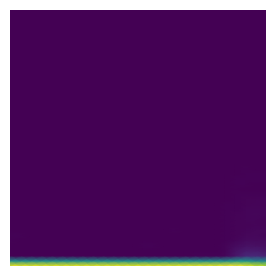

In [15]:
import torch
import matplotlib.pyplot as plt
import numpy as np

x = torch.tensor(data1[0])

# 设置 STFT 参数
n_fft = 100
hop_length = 20
win_length = 100
window = torch.hann_window(win_length)

# 计算频率
freqs = np.fft.rfftfreq(n_fft, d=1/100)

# 计算 STFT
stft_result = torch.stft(x, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window, return_complex=True,normalized=True,onesided=True)

# 计算幅度谱
magnitude = torch.abs(stft_result)

# 将张量转换为 numpy 数组以便使用 matplotlib
magnitude_np = magnitude.numpy()

magnitude_np = np.mean(magnitude_np, axis=0)

# 频率和时间轴

times = np.arange(magnitude_np.shape[1]) * hop_length / 1024

# 保存频谱图
plt.figure(figsize=(2.56, 2.56))
plt.pcolormesh(times, freqs, magnitude_np, shading='gouraud')
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig("spectrogram.png", bbox_inches='tight', pad_inches=0,dpi=100)


In [16]:
magnitude.shape

torch.Size([9, 51, 26])

测试数据

In [20]:
import numpy as np
data=np.load('data/train/Bag.npy')
print(data.shape)
print(data[0][0])

(196072, 9, 500)
[ 9.299079  9.291419  9.304813  9.29334   9.297159  9.299079  9.306677
  9.300996  9.291664  9.297095  9.299079  9.299079  9.299079  9.299079
  9.299079  9.299079  9.299079  9.299079  9.299079  9.299079  9.299079
  9.291423  9.304825  9.300989  9.299079  9.299079  9.299079  9.306742
  9.300992  9.291412  9.304257  9.301065  9.299079  9.306747  9.308656
  9.300988  9.299079  9.291412  9.297166  9.299079  9.299079  9.299079
  9.299079  9.291411  9.297166  9.299079  9.299079  9.299079  9.299079
  9.306677  9.301     9.299079  9.299079  9.299079  9.306735  9.300999
  9.299079  9.306689  9.301239  9.306663  9.301007  9.306713  9.301026
  9.299079  9.299079  9.306739  9.300999  9.306739  9.308656  9.300999
  9.306737  9.293338  9.297161  9.291426  9.297155  9.291419  9.297159
  9.299079  9.291426  9.304817  9.301     9.291417  9.304815  9.300996
  9.299079  9.291418  9.29716   9.299079  9.306734  9.300999  9.299079
  9.299079  9.291433  9.289502  9.289502  9.29716   9.299079

In [26]:
path = 'data/train/label.npy'
with open(path, 'rb') as f:
    data = np.load(f)
    print(data.shape)
    print(data[0])
    print(data[123])

(196072, 500)
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 

In [28]:
data=np.load('fft_data/train/Bag_am.npy')
print(data.shape)
print(data[0][0])

(196072, 9, 251)
[9.47724150e+00 3.52703435e-01 3.47514489e-01 3.37226551e-01
 3.22087735e-01 3.03758902e-01 2.79716853e-01 2.53267807e-01
 2.22479733e-01 1.88970486e-01 1.57408575e-01 1.25513665e-01
 1.00182513e-01 8.23750048e-02 7.70386785e-02 8.17033809e-02
 8.89256161e-02 9.67508975e-02 1.02241902e-01 1.02946274e-01
 1.01079208e-01 9.52755449e-02 8.68790367e-02 7.87815804e-02
 6.92212527e-02 6.13971999e-02 5.61408192e-02 5.51684376e-02
 5.86776811e-02 6.50582254e-02 7.27576157e-02 8.12776987e-02
 9.02587592e-02 9.56357525e-02 1.00445862e-01 1.03092445e-01
 1.02272452e-01 9.97330079e-02 9.41756665e-02 8.77952356e-02
 7.92998013e-02 7.06720880e-02 6.16210467e-02 5.44278757e-02
 4.71311708e-02 4.13863997e-02 3.75602958e-02 3.53294734e-02
 3.53664916e-02 3.65627597e-02 3.63778504e-02 3.75211192e-02
 3.85632092e-02 3.77517944e-02 3.54265201e-02 3.28920362e-02
 2.93836729e-02 2.50487590e-02 2.11483836e-02 1.82441607e-02
 1.76211274e-02 1.94429604e-02 2.18742622e-02 2.37281295e-02
 2.4230

In [7]:
data = np.load('data/train/Bag.npy')
print(data.shape)
print(type(data[0][0][0]))

(196072, 9, 500)
<class 'numpy.float64'>


In [1]:
from tqdm import tqdm
import numpy as np
import cupy as cp
from numpy.lib.format import open_memmap

dataset = 'val'
modal = 'Bag'
shape1 = (28789, 9, 500)
shape2 = (28789, 9, 251)

source = open_memmap('data/{}/{}.npy'.format(dataset, modal),mode='r')

测试两种傅里叶变换

In [5]:
data = np.zeros(shape2, dtype=np.float32)
for i in tqdm(range(shape1[0])):
    for j in range(shape1[1]):
        data[i][j] = np.abs(np.fft.rfft(source[i][j]))
        data[i][j] /= (500 / 2)
        data[i][j][0] /= 2
print(data[2][0])
print(data.shape)

100%|██████████| 28789/28789 [00:02<00:00, 11083.01it/s]

[ 9.816733    0.4588412   0.83366215  0.8428232   0.71999955  0.7122424
  0.40836215  1.6783389   0.90381694  1.2912339   1.6327583   1.6046591
  3.1940274  10.19963     5.4862037   1.7587732   1.8237427   1.2144231
  0.82699937  0.8628854   1.713921    0.5805723   0.59124297  0.54978096
  0.8254655   1.2440892   2.032413    8.109321    1.7719042   1.6112934
  0.54378676  0.29489726  0.9471629   2.3085108   2.9088988   1.5453111
  0.7465006   1.183059    0.551175    2.0069215   6.509483    1.667211
  0.61561227  1.0282452   1.1909372   0.45745882  1.6895076   3.294007
  1.2968094   0.89494294  1.2197224   0.94583     2.2024214   2.9845037
  2.8366723   1.3627931   1.2703395   0.6877027   0.5362963   0.95086914
  2.17435     0.87649137  1.5957453   0.44326606  0.9473286   0.7504507
  1.0245615   3.5213342   1.3057284   0.81415313  0.34144205  0.7217136
  0.710399    1.6274595   1.8028835   1.7891208   0.43962756  1.1786516
  0.47166833  1.5943099   1.8665532   1.0404437   0.7443558   0.

In [6]:
data_cu = np.zeros(shape2, dtype=np.float32)
# 分块处理
chunk_size = 20000  # 默认值
num_chunks = (shape1[0] + chunk_size - 1) // chunk_size
# stream = cp.cuda.Stream(non_blocking=True)
for chunk_idx in tqdm(range(num_chunks)):
    start_idx = chunk_idx * chunk_size
    end_idx = min((chunk_idx + 1) * chunk_size, shape1[0])
    gpu_data = cp.asarray(source[start_idx:end_idx])
    gpu_data = cp.reshape(gpu_data, (((end_idx-start_idx)*shape1[1]), shape1[2]))
    gpu_result = cp.fft.rfft(gpu_data)
    gpu_result = cp.reshape(gpu_result, (end_idx-start_idx, shape1[1], shape1[2]//2+1))
    # 将结果从 GPU 内存复制回 CPU 内存
    data_cu[start_idx:end_idx] = cp.asnumpy(cp.abs(gpu_result))
data_cu /= (500 / 2)
data_cu[:,:,0] /= 2
print(data_cu[2][0])
print(data_cu.shape)

100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

[ 9.816733    0.4588412   0.83366215  0.8428232   0.71999955  0.7122424
  0.40836215  1.6783389   0.90381694  1.2912339   1.6327583   1.6046591
  3.1940274  10.19963     5.4862037   1.7587732   1.8237427   1.2144231
  0.82699937  0.8628854   1.713921    0.5805723   0.59124297  0.54978096
  0.8254655   1.2440892   2.032413    8.109321    1.7719042   1.6112934
  0.54378676  0.29489726  0.9471629   2.3085108   2.9088988   1.5453111
  0.7465006   1.183059    0.551175    2.0069215   6.509483    1.667211
  0.61561227  1.0282452   1.1909372   0.45745882  1.6895076   3.294007
  1.2968094   0.89494294  1.2197224   0.94583     2.2024214   2.9845037
  2.8366723   1.3627931   1.2703395   0.6877027   0.5362963   0.95086914
  2.17435     0.87649137  1.5957453   0.44326606  0.9473286   0.7504507
  1.0245615   3.5213342   1.3057284   0.81415313  0.34144205  0.7217136
  0.710399    1.6274595   1.8028835   1.7891208   0.43962756  1.1786516
  0.47166833  1.5943099   1.8665532   1.0404437   0.7443558   0.

In [7]:
print(np.allclose(data,data_cu,rtol=1e-8,atol=1e-8))

True


结论：误差非常非常非常小